In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib notebook

# Data Processing

In [2]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Religion_in_Ukraine')
regions_df = tables[4]
regions_df.head()

,Oblast,Region[h],Orthodox,Greek Catholic,Latin Catholic,Protestant,Christian (unspecified),Not religious,Difficult to answer (incl. others)
0,Cherkasy Oblast,Center,89%,0.5%,0.5%,1%,5%,3%,1%
1,Chernihiv Oblast,Center,87%,0%,0%,0%,9%,2%,2%
2,Chernivtsi Oblast,West,86%,2%,1%,2%,5%,2%,2%
3,Dnipropetrovsk Oblast,East,83%,0%,0.5%,0.5%,9%,5%,2%
4,Donetsk Oblast,Donbas,69%,0%,0%,1%,15%,10%,5%


In [3]:
regions_df = regions_df.iloc[:, :-2]
regions_df = regions_df.drop(columns='Protestant')
regions_df = regions_df.rename(columns=lambda x: re.sub('\[.*\]|\(.*\)','',x))
regions_df.columns = regions_df.columns.map(lambda x: x.strip())
regions_df = regions_df.rename(columns={'Christian': 'Just Christian'})
regions_df.columns

Index(['Oblast', 'Region', 'Orthodox', 'Greek Catholic', 'Latin Catholic',
       'Just Christian'],
      dtype='object')

In [4]:
regions_df = regions_df.applymap(lambda x: x.replace('%', ''))
regions_df.head()

,Oblast,Region,Orthodox,Greek Catholic,Latin Catholic,Just Christian
0,Cherkasy Oblast,Center,89,0.5,0.5,5
1,Chernihiv Oblast,Center,87,0,0,9
2,Chernivtsi Oblast,West,86,2,1,5
3,Dnipropetrovsk Oblast,East,83,0,0.5,9
4,Donetsk Oblast,Donbas,69,0,0,15


In [5]:
for col in regions_df.columns[2:]:
    regions_df[col] = regions_df[col].astype(float)
regions_df = regions_df.groupby('Region').agg('mean')
regions_df.index.name = ''
regions_df

,Orthodox,Greek Catholic,Latin Catholic,Just Christian
,,,,
Center,80.900000,0.700000,0.800000,9.900000
Donbas,70.000000,0.250000,0.000000,11.500000
East,77.333333,0.000000,0.166667,10.666667
South,79.666667,0.333333,0.166667,7.333333
West,63.285714,27.285714,2.214286,4.071429


In [6]:
years_df = tables[2]
years_df.head()

,Unnamed: 0,2000[10][11][12],2005[10][11][12],Nov 2010[10][11][12],Mar 2013[10][11][12][13],Apr 2014[11][12],Feb 2015[14],July 2015[15],Mar 2016[12],Nov 2016[16],Apr 2018[1]
0,Orthodox,66.0%,60.8%,68.1%,70.6%,70.2%,73.7%,78%,65.4%,64.7%,67.3%
1,Latin Catholic,0.5%,1.6%,0.4%,1.3%,1.0%,0.8%,10% (including Greek),1.0%,0.8%,0.8%
2,Greek Catholic,7.6%,7.6%,7.6%,5.7%,7.8%,8.1%,-,6.5%,8.2%,9.4%
3,Protestant[b],2.0%,1.3%,1.9%,0.8%,1.0%,0.9%,4%,2.2% (other Christian),1.9%,2.2%
4,Jewish,0.3%,0.2%,0.1%,0.3%,0.1%,-,-,0.2%,0.2%,0.4%


In [7]:
years_df.columns = years_df.columns.map(lambda x: x.strip())
years_df = years_df.rename(columns=lambda x: re.sub('\[.*\]|^[a-zA-z]{3,4}\s','',x))
years_df = years_df.iloc[:, :-4]
years_df = years_df.rename(columns={'Unnamed: 0': 'Religion'})
years_df

,Religion,2000,2005,2010,2013,2014,2015
0,Orthodox,66.0%,60.8%,68.1%,70.6%,70.2%,73.7%
1,Latin Catholic,0.5%,1.6%,0.4%,1.3%,1.0%,0.8%
2,Greek Catholic,7.6%,7.6%,7.6%,5.7%,7.8%,8.1%
3,Protestant[b],2.0%,1.3%,1.9%,0.8%,1.0%,0.9%
4,Jewish,0.3%,0.2%,0.1%,0.3%,0.1%,-
5,Islam,0.7%,0.4%,0.9%,0.7%,0.2%,-
6,Buddhist,0.1%,0.0%,0.1%,0.0%,0.2%,-
7,Hindu,0.0%,0.0%,0.0%,0.1%,0.0%,-
8,Pagan,0.1%,0.0%,0.0%,0.1%,0.0%,-
9,Just Christian,6.9%,15.8%,7.2%,8.6%,6.3%,8.5%


In [8]:
years_df['2015'] = years_df['2015'].str.extract(r'(.+%)')
years_df

,Religion,2000,2005,2010,2013,2014,2015
0,Orthodox,66.0%,60.8%,68.1%,70.6%,70.2%,73.7%
1,Latin Catholic,0.5%,1.6%,0.4%,1.3%,1.0%,0.8%
2,Greek Catholic,7.6%,7.6%,7.6%,5.7%,7.8%,8.1%
3,Protestant[b],2.0%,1.3%,1.9%,0.8%,1.0%,0.9%
4,Jewish,0.3%,0.2%,0.1%,0.3%,0.1%,NaN
5,Islam,0.7%,0.4%,0.9%,0.7%,0.2%,NaN
6,Buddhist,0.1%,0.0%,0.1%,0.0%,0.2%,NaN
7,Hindu,0.0%,0.0%,0.0%,0.1%,0.0%,NaN
8,Pagan,0.1%,0.0%,0.0%,0.1%,0.0%,NaN
9,Just Christian,6.9%,15.8%,7.2%,8.6%,6.3%,8.5%


In [9]:
years_df['Religion'] = years_df['Religion'].str.replace('\[.*\]', '', regex=True)
years_df

,Religion,2000,2005,2010,2013,2014,2015
0,Orthodox,66.0%,60.8%,68.1%,70.6%,70.2%,73.7%
1,Latin Catholic,0.5%,1.6%,0.4%,1.3%,1.0%,0.8%
2,Greek Catholic,7.6%,7.6%,7.6%,5.7%,7.8%,8.1%
3,Protestant,2.0%,1.3%,1.9%,0.8%,1.0%,0.9%
4,Jewish,0.3%,0.2%,0.1%,0.3%,0.1%,NaN
5,Islam,0.7%,0.4%,0.9%,0.7%,0.2%,NaN
6,Buddhist,0.1%,0.0%,0.1%,0.0%,0.2%,NaN
7,Hindu,0.0%,0.0%,0.0%,0.1%,0.0%,NaN
8,Pagan,0.1%,0.0%,0.0%,0.1%,0.0%,NaN
9,Just Christian,6.9%,15.8%,7.2%,8.6%,6.3%,8.5%


In [10]:
years_df = years_df.dropna().reset_index(drop=True)
years_df = years_df.applymap(lambda x: x.replace('%', ''))
years_df

,Religion,2000,2005,2010,2013,2014,2015
0,Orthodox,66.0,60.8,68.1,70.6,70.2,73.7
1,Latin Catholic,0.5,1.6,0.4,1.3,1.0,0.8
2,Greek Catholic,7.6,7.6,7.6,5.7,7.8,8.1
3,Protestant,2.0,1.3,1.9,0.8,1.0,0.9
4,Just Christian,6.9,15.8,7.2,8.6,6.3,8.5
5,Other,0.5,0.2,0.2,0.0,0.0,0.7
6,Do not consider myself to be any of these cree...,15.3,11.8,13.2,11.3,12.5,6.1
7,No answer,-,0.2,0.3,0.5,0.7,1.1


In [11]:
years_df.set_index('Religion', inplace=True)
years_df = years_df.loc[:'Just Christian']
years_df = years_df.drop('Protestant')
years_df = years_df.transpose()
years_df = years_df.astype(float)
years_df.columns.name = ''
years_df

,Orthodox,Latin Catholic,Greek Catholic,Just Christian
2000,66.0,0.5,7.6,6.9
2005,60.8,1.6,7.6,15.8
2010,68.1,0.4,7.6,7.2
2013,70.6,1.3,5.7,8.6
2014,70.2,1.0,7.8,6.3
2015,73.7,0.8,8.1,8.5


# Plotting

<IPython.core.display.Javascript object>


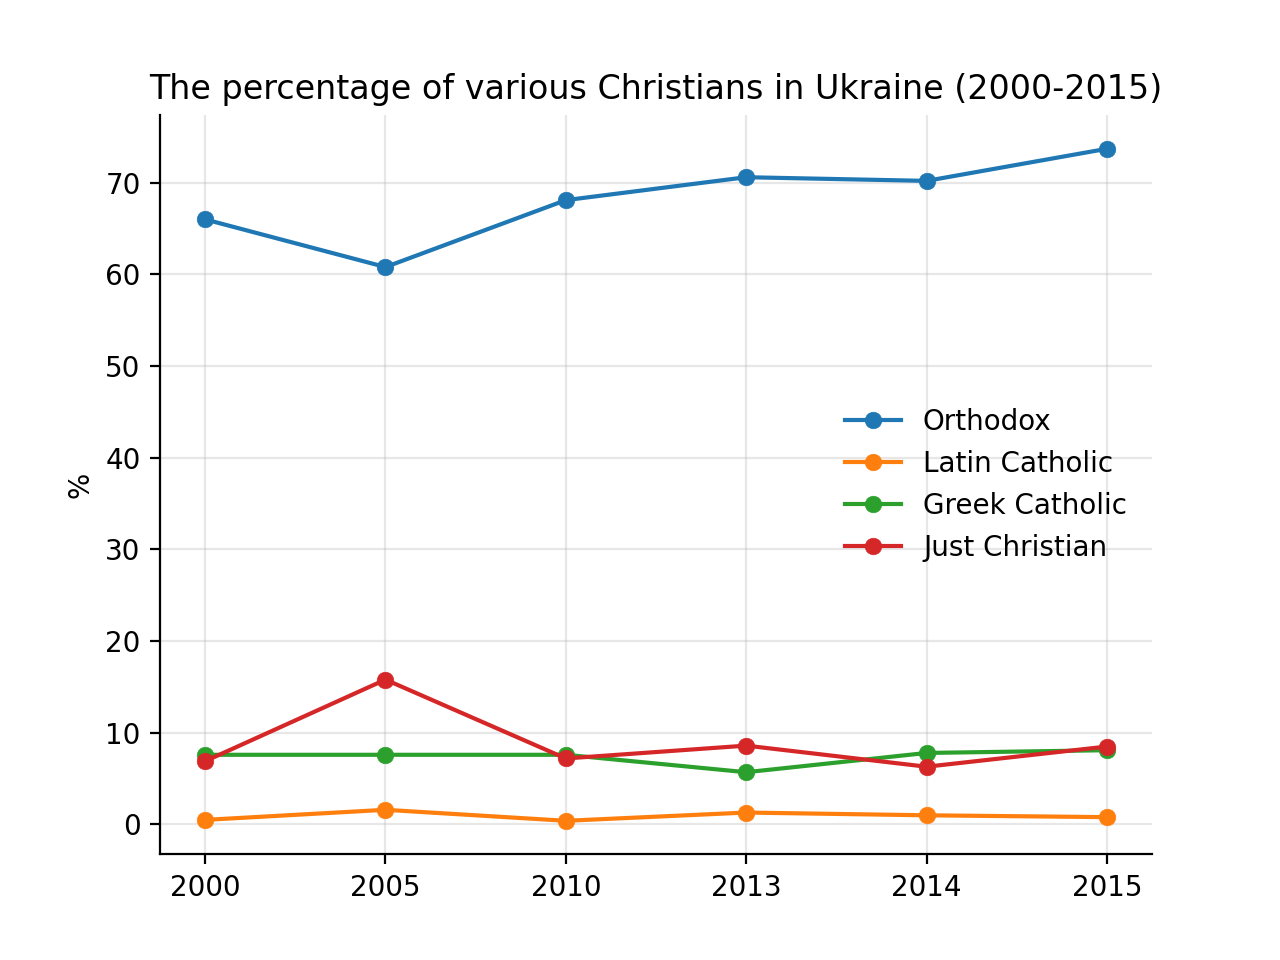

In [12]:
plt.figure()
plt.plot(years_df, '-o', label=years_df.columns, markeredgewidth=0.2);
ax = plt.gca()
ax.set_title('The percentage of various Christians in Ukraine (2000-2015)')
plt.ylabel('%')
plt.grid(alpha=0.3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.legend(frameon=False);
plt.savefig('christians_to_2015.png')

<IPython.core.display.Javascript object>


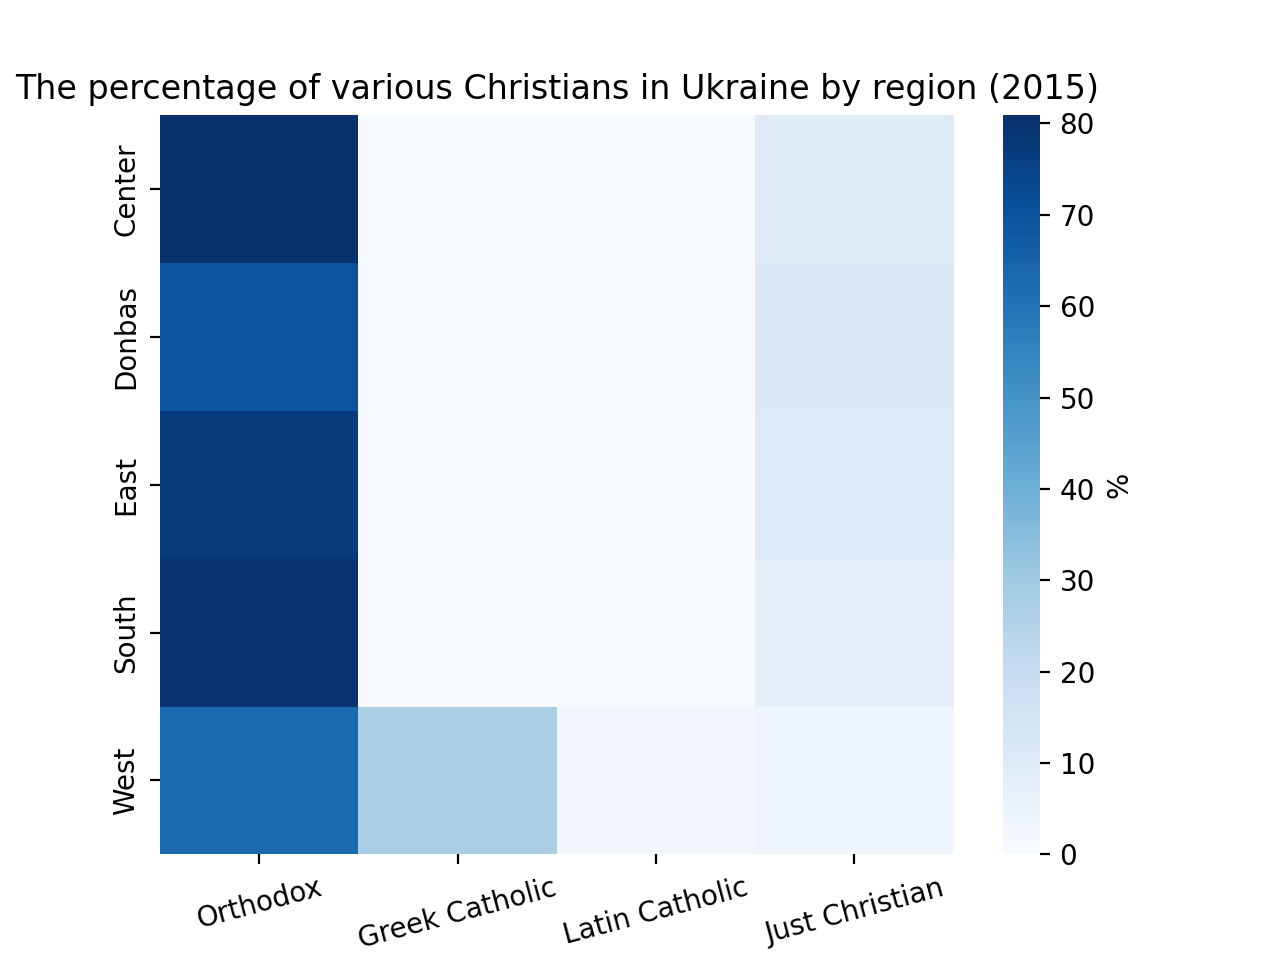

In [13]:
plt.figure()
ax = sns.heatmap(regions_df, cmap="Blues", cbar_kws={'label': '%'})
ax.tick_params(axis='x', top=False, bottom=True, labelbottom=True, labelrotation=15)
ax.set_title('The percentage of various Christians in Ukraine by region (2015)');
plt.savefig('christians_by_region.png')